**Load the Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

**Explore Data**

In [2]:
from tensorflow.keras.utils import to_categorical


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 5')

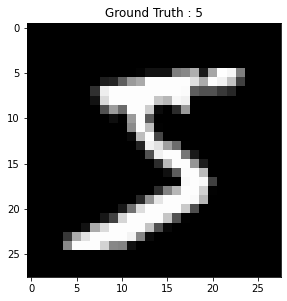

In [ ]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

Text(0.5, 1.0, 'Ground Truth : 7')

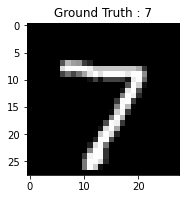

In [ ]:
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

**Process the data**

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784
dim_data = np.prod(train_images.shape[1:])
print("dim_data:", dim_data)

train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

dim_data: 784


In [ ]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

**Create the Network Architecure**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

**Configure the Network**

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 5.3146 - accuracy: 0.8778 - val_loss: 0.6292 - val_accuracy: 0.9324
Epoch 2/20
235/235 [==============================] - 6s 23ms/step - loss: 0.4444 - accuracy: 0.9454 - val_loss: 0.3465 - val_accuracy: 0.9443
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.2560 - accuracy: 0.9584 - val_loss: 0.3577 - val_accuracy: 0.9437
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2103 - accuracy: 0.9658 - val_loss: 0.3463 - val_accuracy: 0.9574
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1845 - accuracy: 0.9725 - val_loss: 0.3986 - val_accuracy: 0.9621
Epoch 6/20
235/235 [==============================] - 8s 34ms/step - loss: 0.1666 - accuracy: 0.9761 - val_loss: 0.3493 - val_accuracy: 0.9599
Epoch 7/20
235/235 [==============================] - 9s 40ms/step - loss: 0.1432 - accuracy: 0.9792 - val_loss: 0.4181 - val_accuracy: 0.9636

**Evaluate the trained model**

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.7363 - accuracy: 0.9766
Evaluation result on Test Data : Loss = 0.7363115549087524, accuracy = 0.9765999913215637


**Display Loss and Accuracy Plots**

Text(0.5, 1.0, 'Accuracy Curves')

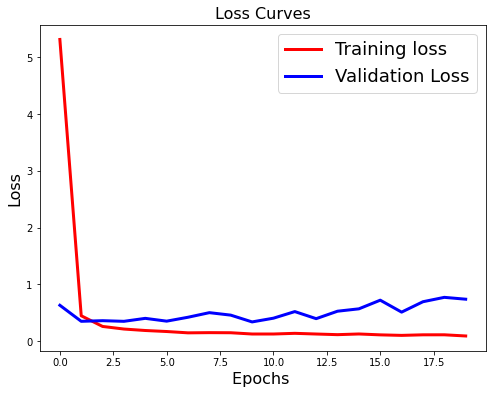

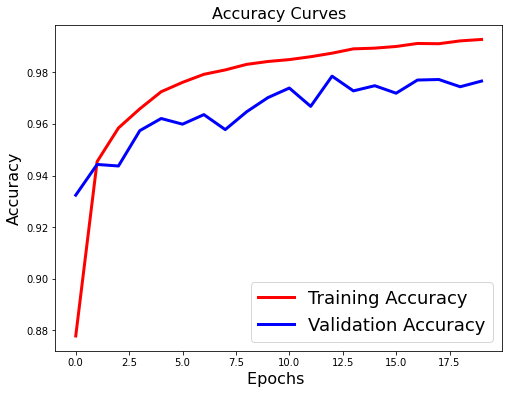

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

**Testing a single image**

Model prediction: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Ground Truth : 2')

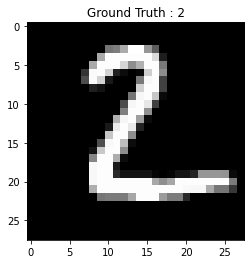

In [ ]:
# Predict the most likely class
print("Model prediction: {}".format(model.predict(test_data[[1],:])[0]))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))